# Explore CMIP6 data on Casper

Ensure you have the required libraries installed, these will make it much easier to work with the data

In [1]:
# ! pip install netcdf4 xarray[io] cartopy nc-time-axis

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import os.path

import matplotlib.pyplot as plt
# Useful for plotting maps
import cartopy.crs as ccrs

# This can be useful for working with multiple processors - to be explored later on
# from dask.distributed import Client, LocalCluster

Output data is in `/glade/collections/cmip/CMIP6/{activity}/NCC/NorESM2-LM/{experiment}`

You can also find other model data here, in particular the NCAR model:
Example path: `/glade/collections/cmip/CMIP6/DAMIP/NCAR/CESM2/hist-aer/r1i1p1f1/Amon/tas/gn/latest/*.nc`



Input data is in: `/glade/p/cesmdata/cseg/inputdata/atm/cam/chem/emis/`

The model names are not very obvious but you can either google them, ask ChatGPT, or look them up in these structured dictionaries: https://github.com/PCMDI/cmip6-cmor-tables/tree/main/Tables (which can be queried with e.g. Pandas)

In [3]:
def get_MIP(experiment):
    """
    Utility function to get teh activity associated with a particular experiment
    """
    if experiment == 'ssp245-covid':
        return 'DAMIP'
    elif experiment == 'ssp370-lowNTCF':
        return 'AerChemMIP'
    elif experiment.startswith('ssp'):
        return 'ScenarioMIP'
    elif experiment.startswith('hist-'):
        return 'DAMIP'
    else:
        return 'CMIP'


In [4]:
def get_data(variable, experiment, member):
    """
    Read a particular CMIP6 (Amon) variable from NorESM2
    """
    import glob
    files = glob.glob(f"/glade/collections/cmip/CMIP6/{get_MIP(experiment)}/NCC/NorESM2-LM/{experiment}/{member}/Amon/{variable}/gn/v20190815/{variable}/*.nc")
    return xr.open_mfdataset(files)[variable]

In [5]:
tas = get_data('tas', 'historical', 'r1i1p1f1')

*Note*, the ensemble member format: 
`r` for realization, `i` for initialization, `p` for physics, and `f` for forcing

We're only interested in different realizations in this project, so try different r numbers but keep the rest the same: E.g.: `r1i1p1f1`, `r2i1p1f1`, `r3i1p1f1`

In [6]:
# When averaging gridded data on a sphere, we need to account for the fact that
    #the values near the poles have less area
weights = np.cos(np.deg2rad(tas.lat))
weights.name = "weights"

tas_timeseries = tas.weighted(weights).mean(['lat', 'lon'])

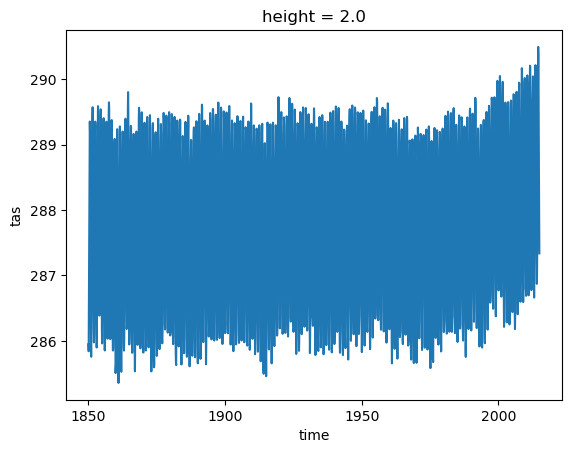

In [7]:
tas_timeseries.plot()

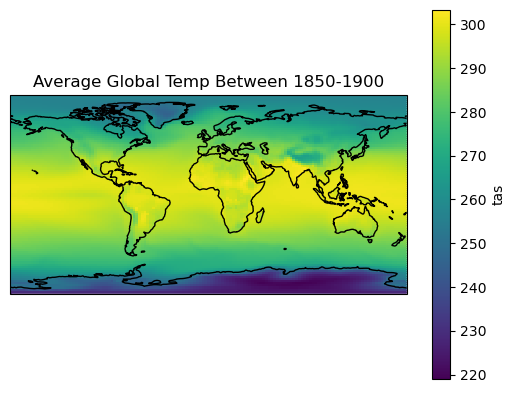

In [8]:
# Plot a map of the average temperature between 1850-1900

tas.sel(time=slice('1850','1900')).mean('time').plot(
    transform=ccrs.PlateCarree(), # This is the projection the data is stored as
    subplot_kws={"projection": ccrs.PlateCarree()}, # This describes the projection to plot onto (which happens to be the projection the data is already in so no transformation is needed in this case)
)

# Feel free to explore other projections here: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

plt.title("Average Global Temp Between 1850-1900")
plt.gca().coastlines()

### Plot a map of the average global temperature between 2005-2015

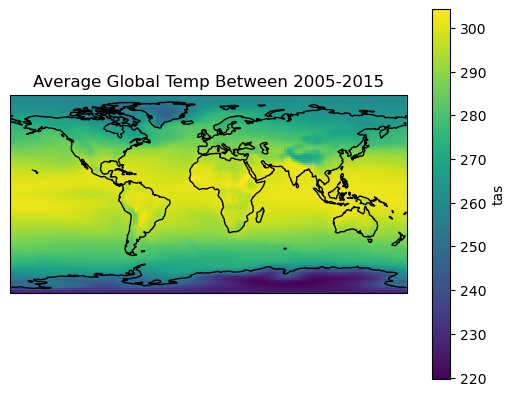

In [9]:
tas.sel(time=slice('2005','2015')).mean('time').plot(
    transform=ccrs.PlateCarree(), # This is the projection the data is stored as
    subplot_kws={"projection": ccrs.PlateCarree()}, # This describes the projection to plot onto (which happens to be the projection the data is already in so no transformation is needed in this case)
)
plt.title("Average Global Temp Between 2005-2015")
plt.gca().coastlines()

### Plot a map of the difference in global temperature from 1850-1900 to 2005-2015 with appropriate colorbar and title

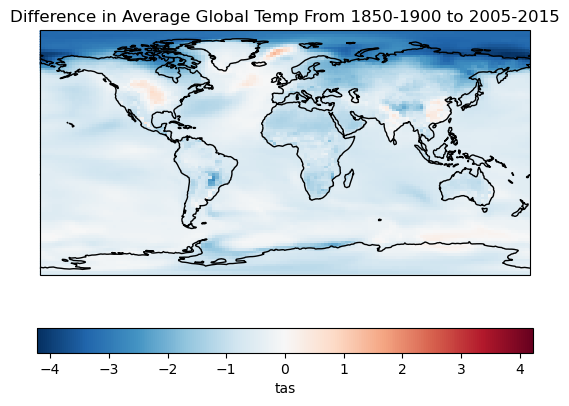

In [10]:
difference = tas.sel(time=slice('1850', '1900')).mean('time') - tas.sel(time=slice('2005', '2015')).mean('time')

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
c = difference.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'orientation': 'horizontal'}  # Make the color bar horizontal
)
plt.title("Difference in Average Global Temp From 1850-1900 to 2005-2015")
ax.coastlines()
plt.subplots_adjust(bottom=0.15)  # Adjust as needed
plt.show()


### Precipitation

In [11]:
pr = get_data('pr', 'historical', 'r1i1p1f1')

### Average Precipitation between 1850-1900

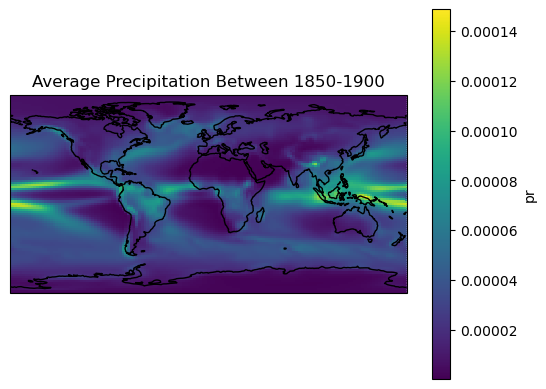

In [12]:
# Plot a map of the average precipitation between 1850-1900

pr.sel(time=slice('1850','1900')).mean('time').plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree()},
)
plt.title("Average Precipitation Between 1850-1900")
plt.gca().coastlines()
plt.show()

### Average Precipitation between 2005-2015

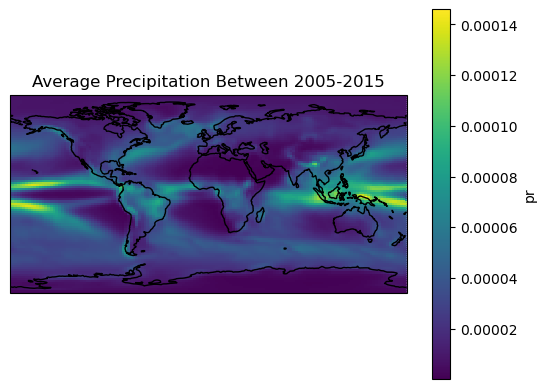

In [13]:
pr.sel(time=slice('2005','2015')).mean('time').plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree()},
)
plt.title("Average Precipitation Between 2005-2015")
plt.gca().coastlines()
plt.show()

### Difference in global precipitation from 1850-1900 to 2005-2015

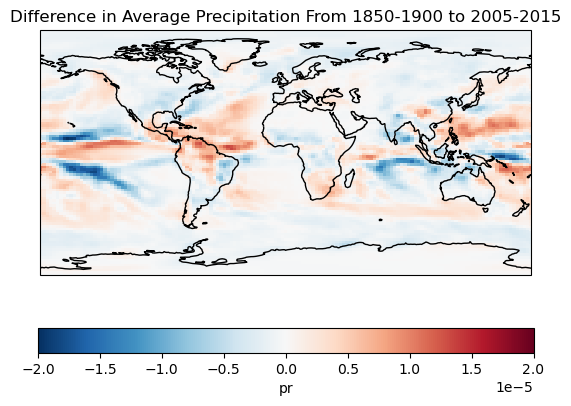

In [14]:
difference = pr.sel(time=slice('1850', '1900')).mean('time') - pr.sel(time=slice('2005', '2015')).mean('time')

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
c = difference.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'orientation': 'horizontal'}  # Make the color bar horizontal
)
plt.title("Difference in Average Precipitation From 1850-1900 to 2005-2015")
ax.coastlines()
plt.subplots_adjust(bottom=0.15)  # Adjust as needed
plt.show()

### Daily Maximum Temperature

In [15]:
def get_data_daily(variable, experiment, member):
    """
    Read a particular CMIP6 (Amon) variable from NorESM2
    """
    import glob
    files = glob.glob(f"/glade/collections/cmip/CMIP6/{get_MIP(experiment)}/NCC/NorESM2-LM/{experiment}/{member}/day/{variable}/gn/v20190815/{variable}/*.nc")
    return xr.open_mfdataset(files)[variable]

In [16]:
tasmax = get_data_daily('tasmax', 'historical', 'r1i1p1f1')

### Average Global Daily Maximum Temperature Between 1850-1900

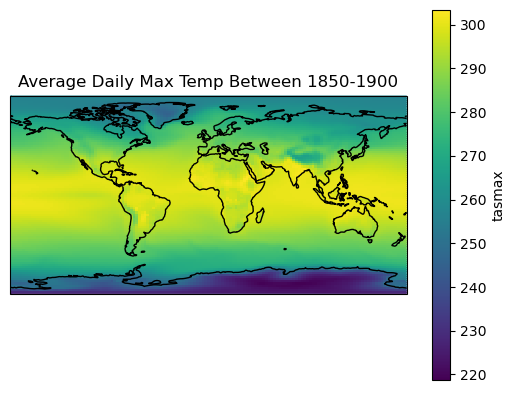

In [17]:
# Plot a map of the average precipitation between 1850-1900

tasmax.sel(time=slice('1850','1900')).mean('time').plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree()},
)
plt.title("Average Daily Max Temp Between 1850-1900")
plt.gca().coastlines()
plt.show()

### Average Global Daily Maximum Temperature Between 2005-2015

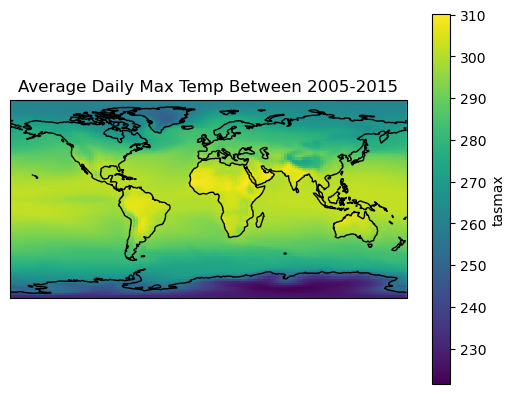

In [18]:
tasmax.sel(time=slice('2005','2015')).mean('time').plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree()},
)
plt.title("Average Daily Max Temp Between 2005-2015")
plt.gca().coastlines()
plt.show()

### Difference in global precipitation from 1850-1900 to 2005-2015

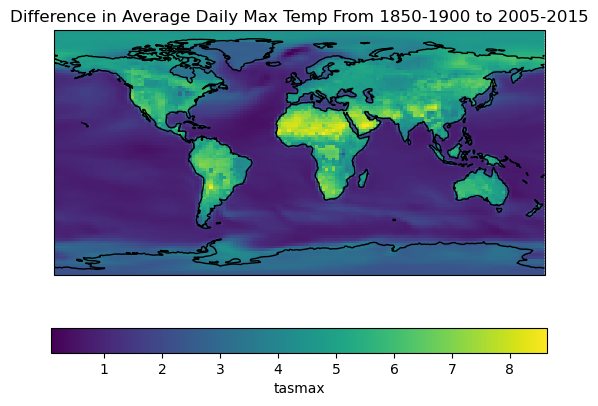

In [33]:
difference = tasmax.sel(time=slice('2005', '2015')).mean('time') - tasmax.sel(time=slice('1850', '1900')).mean('time')

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
c = difference.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'orientation': 'horizontal'}  # Make the color bar horizontal
)
plt.title("Difference in Average Daily Max Temp From 1850-1900 to 2005-2015")
ax.coastlines()
plt.subplots_adjust(bottom=0.15)  # Adjust as needed
plt.show()

### Time Series for Precipitation and Daily Maximum Temperature

In [20]:
weights = np.cos(np.deg2rad(pr.lat))
weights.name = "weights"

pr_timeseries = pr.weighted(weights).mean(['lat', 'lon'])

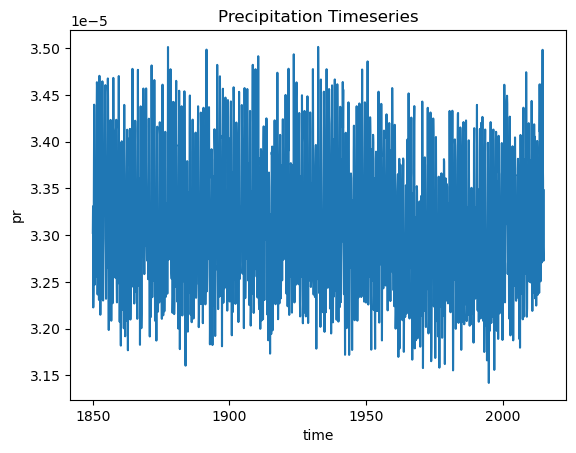

In [21]:
pr_timeseries.plot()
plt.title("Precipitation Timeseries")
plt.show()

In [22]:
weights = np.cos(np.deg2rad(tasmax.lat))
weights.name = "weights"

tasmax_timeseries = tasmax.weighted(weights).mean(['lat', 'lon'])

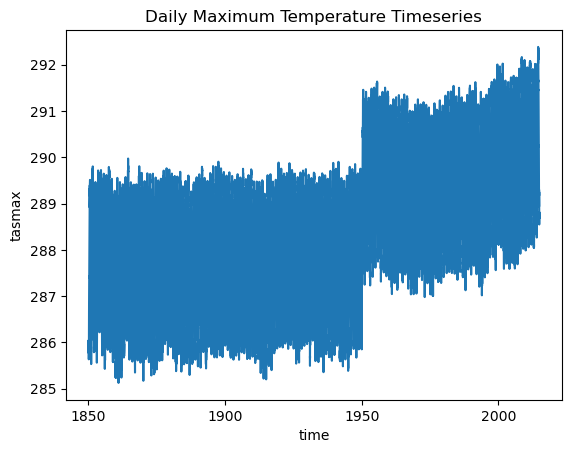

In [23]:
tasmax_timeseries.plot()
plt.title("Daily Maximum Temperature Timeseries")
plt.show()

### Chosen Variable: "Surface Downwelling Shortwave Radiation"

In [24]:
rsds = get_data('rsds', 'historical', 'r1i1p1f1')

In [25]:
rsds

<xarray.DataArray 'rsds' (time: 960, lat: 96, lon: 144)> Size: 53MB
dask.array<concatenate, shape=(960, 96, 144), dtype=float32, chunksize=(1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 8kB 1850-01-16 12:00:00 ... 2009-12-16 12:00:00
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    standard_name:   surface_downwelling_shortwave_flux_in_air
    long_name:       Surface Downwelling Shortwave Radiation
    comment:         Surface solar irradiance for UV calculations.
    units:           W m-2
    original_name:   FSDS
    original_units:  W/m2
    history:         2019-08-15T12:23:15Z altered by CMOR: Converted units fr...
    cell_methods:    area: time: mean
    cell_measures:   area: areacella

In [26]:
output_folder = "Week2"

### Average Global Surface Downwelling Shortwave Radiation Between 1850-1900

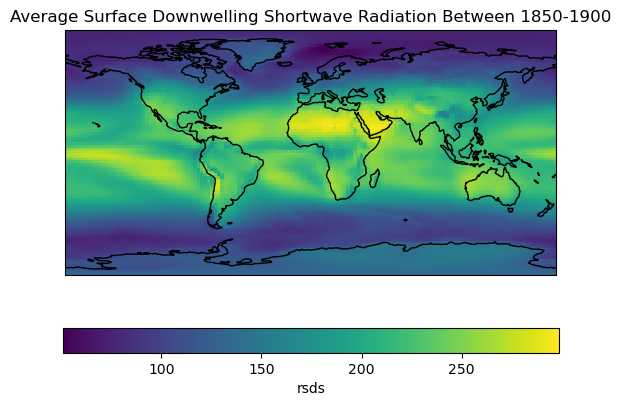

In [27]:
rsds_1850_1900 = rsds.sel(time=slice('1850', '1900')).mean('time')

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
c = rsds_1850_1900.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'orientation': 'horizontal'}  # Make the color bar horizontal
)
plt.title("Average Surface Downwelling Shortwave Radiation Between 1850-1900")
ax.coastlines()
plt.subplots_adjust(bottom=0.15)  # Adjust as needed
output_filename = "avg_rsds_1850_1900.png"
plt.savefig(f"{output_folder}/{output_filename}")
plt.show()

### Average Global Surface Downwelling Shortwave Radiation Between 2005-2005

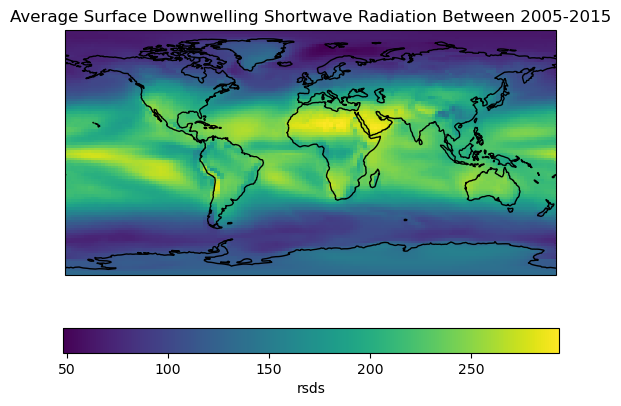

In [28]:
rsds_2005_2005 = rsds.sel(time=slice('2005', '2015')).mean('time')

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
c = rsds_2005_2005.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'orientation': 'horizontal'}  # Make the color bar horizontal
)
plt.title("Average Surface Downwelling Shortwave Radiation Between 2005-2015")
ax.coastlines()
plt.subplots_adjust(bottom=0.15)  # Adjust as needed
output_filename = "avg_rsds_2005_2015.png"
plt.savefig(f"{output_folder}/{output_filename}")
plt.show()

### Difference in global Surface Downwelling Shortwave Radiation from 1850-1900 to 2005-2015

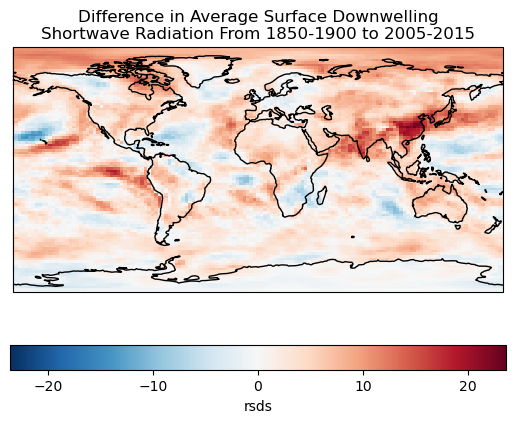

In [29]:
difference = rsds.sel(time=slice('1850', '1900')).mean('time') - rsds.sel(time=slice('2005', '2015')).mean('time')

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
c = difference.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'orientation': 'horizontal'}  # Make the color bar horizontal
)
plt.title("Difference in Average Surface Downwelling\nShortwave Radiation From 1850-1900 to 2005-2015")
ax.coastlines()
plt.subplots_adjust(bottom=0.15)  # Adjust as needed
output_filename = "diff_avg_rsds.png"
plt.savefig(f"{output_folder}/{output_filename}")
plt.show()

### Time Series for Surface Downwelling Shortwave Radiation

In [30]:
weights = np.cos(np.deg2rad(rsds.lat))
weights.name = "weights"

rsds_timeseries = rsds.weighted(weights).mean(['lat', 'lon'])

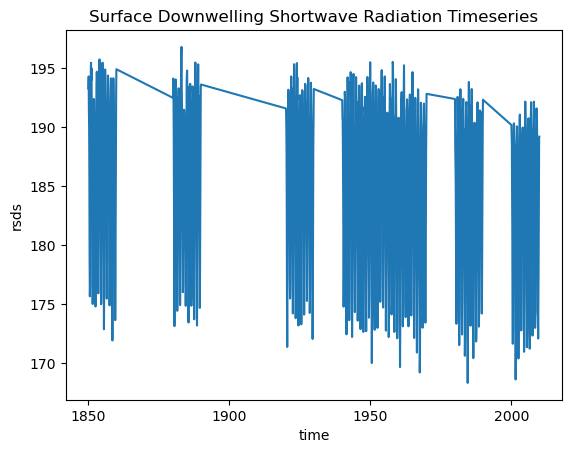

In [31]:
rsds_timeseries.plot()
plt.title("Surface Downwelling Shortwave Radiation Timeseries")
output_filename = "rsds_timeseries.png"
plt.savefig(f"{output_folder}/{output_filename}")
plt.show()

### ChatGPT Code

Helped me figure out the different variable names.

In [32]:
# import xarray as xr
# import glob
# import os

# def find_variables_in_path(base_path):
#     # Search for all variable subdirectories (e.g., 'tas', 'pr', etc.) in the 'Amon' folder
#     variable_dirs = glob.glob(f"{base_path}/Amon/*/")
    
#     print("Found variables:")
#     for variable_dir in variable_dirs:
#         # Extract the variable name from the directory path
#         variable_name = os.path.basename(os.path.normpath(variable_dir))
#         print(variable_name)

#         # Optionally, you can explore the contents of one of the variable files
#         nc_files = glob.glob(f"{variable_dir}/gn/latest/*.nc")
#         if nc_files:
#             # Open the first file and list its variables
#             ds = xr.open_dataset(nc_files[0])
#             # print(f"  Variables inside {variable_name}:")
#             # for var in ds.variables:
#             #     print(f"    {var}")
#         else:
#             print(f"  No .nc files found for {variable_name}")

# # Path to where you want to search (adjusting to go up one directory from 'tas')
# base_path = "/glade/collections/cmip/CMIP6/DAMIP/NCAR/CESM2/hist-aer/r1i1p1f1"
# find_variables_in_path(base_path)

Found variables:
prc
rtmt


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'prc' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rtmt' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


hfls
ch4global


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'hfls' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'ch4global' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'hur' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


hur
sfcWind


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'sfcWind' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rlds' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


rlds
prw


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'prw' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'hus' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


hus
n2oglobal
clwvi
prsn


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'n2oglobal' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'clwvi' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'prsn' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


va


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'va' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


cfc11global
tauu
rlutcs


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'cfc11global' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'tauu' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rlutcs' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


tas


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'clt' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


clt
tauv


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'tauv' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'cfc12global' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'ci' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


cfc12global
ci
co2


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'co2' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'clivi' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


clivi
cl


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'cl' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'ua' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


ua
hfss
ps


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'hfss' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'ps' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'o3' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


o3
wap


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'wap' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rsds' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


rsds
rlus


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rlus' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rsutcs' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


rsutcs
rsdt


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rsdt' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


tasmin
ta


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'tasmin' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'ta' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


rlut
hurs


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rlut' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'hurs' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


co2mass
sbl


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'co2mass' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'sbl' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


rldscs
psl


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rldscs' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'psl' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


pr
tasmax


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'tasmax' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


clw


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'clw' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'huss' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


huss
zg


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'zg' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


evspsbl
rsuscs


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'evspsbl' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rsuscs' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


rsus


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rsus' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


cli


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'cli' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


rsut


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rsut' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'ts' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


ts
rsdscs


/glade/u/home/zludena/.local/lib/python3.10/site-packages/xarray/conventions.py:284: SerializationWarning: variable 'rsdscs' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
